In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df_can=data
df_can.head

<bound method NDFrame.head of            Type    Coverage          OdName  AREA AreaName   REG  \
0    Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1    Immigrants  Foreigners         Albania   908   Europe   925   
2    Immigrants  Foreigners         Algeria   903   Africa   912   
3    Immigrants  Foreigners  American Samoa   909  Oceania   957   
4    Immigrants  Foreigners         Andorra   908   Europe   925   
..          ...         ...             ...   ...      ...   ...   
190  Immigrants  Foreigners        Viet Nam   935     Asia   920   
191  Immigrants  Foreigners  Western Sahara   903   Africa   912   
192  Immigrants  Foreigners           Yemen   935     Asia   922   
193  Immigrants  Foreigners          Zambia   903   Africa   910   
194  Immigrants  Foreigners        Zimbabwe   903   Africa   910   

                RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0         Southern Asia  902  Developing regions    16  ...  2978  3436 

In [3]:
print(df_can.columns)

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')


In [4]:
df_can.shape

(195, 43)

In [5]:
df_can.describe

<bound method NDFrame.describe of            Type    Coverage          OdName  AREA AreaName   REG  \
0    Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1    Immigrants  Foreigners         Albania   908   Europe   925   
2    Immigrants  Foreigners         Algeria   903   Africa   912   
3    Immigrants  Foreigners  American Samoa   909  Oceania   957   
4    Immigrants  Foreigners         Andorra   908   Europe   925   
..          ...         ...             ...   ...      ...   ...   
190  Immigrants  Foreigners        Viet Nam   935     Asia   920   
191  Immigrants  Foreigners  Western Sahara   903   Africa   912   
192  Immigrants  Foreigners           Yemen   935     Asia   922   
193  Immigrants  Foreigners          Zambia   903   Africa   910   
194  Immigrants  Foreigners        Zimbabwe   903   Africa   910   

                RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0         Southern Asia  902  Developing regions    16  ...  2978  3

In [6]:
df_can.info

<bound method DataFrame.info of            Type    Coverage          OdName  AREA AreaName   REG  \
0    Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1    Immigrants  Foreigners         Albania   908   Europe   925   
2    Immigrants  Foreigners         Algeria   903   Africa   912   
3    Immigrants  Foreigners  American Samoa   909  Oceania   957   
4    Immigrants  Foreigners         Andorra   908   Europe   925   
..          ...         ...             ...   ...      ...   ...   
190  Immigrants  Foreigners        Viet Nam   935     Asia   920   
191  Immigrants  Foreigners  Western Sahara   903   Africa   912   
192  Immigrants  Foreigners           Yemen   935     Asia   922   
193  Immigrants  Foreigners          Zambia   903   Africa   910   
194  Immigrants  Foreigners        Zimbabwe   903   Africa   910   

                RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0         Southern Asia  902  Developing regions    16  ...  2978  343

In [7]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'},inplace=True)

df_can.head

<bound method NDFrame.head of             Country Continent              Region             DevName  1980  \
0       Afghanistan      Asia       Southern Asia  Developing regions    16   
1           Albania    Europe     Southern Europe   Developed regions     1   
2           Algeria    Africa     Northern Africa  Developing regions    80   
3    American Samoa   Oceania           Polynesia  Developing regions     0   
4           Andorra    Europe     Southern Europe   Developed regions     0   
..              ...       ...                 ...                 ...   ...   
190        Viet Nam      Asia  South-Eastern Asia  Developing regions  1191   
191  Western Sahara    Africa     Northern Africa  Developing regions     0   
192           Yemen      Asia        Western Asia  Developing regions     1   
193          Zambia    Africa      Eastern Africa  Developing regions    11   
194        Zimbabwe    Africa      Eastern Africa  Developing regions    72   

     1981  1982  1983

In [8]:
#Storing range of 1980 to 2014 in years 
years = [str(year) for year in range(1980,2014)]

In [9]:
df_can['Total'] = df_can.iloc[:,4:].sum(axis=1)

In [10]:
df_can.set_index('Country', inplace=True)

In [11]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


# Let's view the number of immigrants from
Japan (row 87) for the following scenarios:

1. The full row data (all columns)

2. For year 2013

3. For years 1980 to 1985

In [12]:
# 1.The full row data (all columns)
print(df_can.loc['Japan'])

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [13]:
# 2.For year 2013
print(df_can.loc['Japan', 2013])

982


In [14]:
# 3.For years 1980 to 1985
print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1985]])
print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]])

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object
1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object


In [15]:
#convert the column names into strings from '1980' to '2013'
df_can.columns = list(map(str, df_can.columns))

In [16]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Plot a line graph of immigration from Haiti using df.plot().

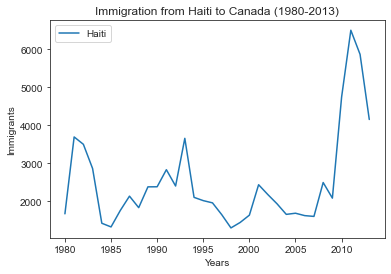

In [17]:
haiti = df_can.loc['Haiti',years].to_frame()

#Line Plot

sns.set_style('ticks')
haiti.plot(kind='line')
plt.title('Immigration from Haiti to Canada (1980-2013)')
plt.xlabel('Years')
plt.ylabel('Immigrants')
plt.show()

# Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [18]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


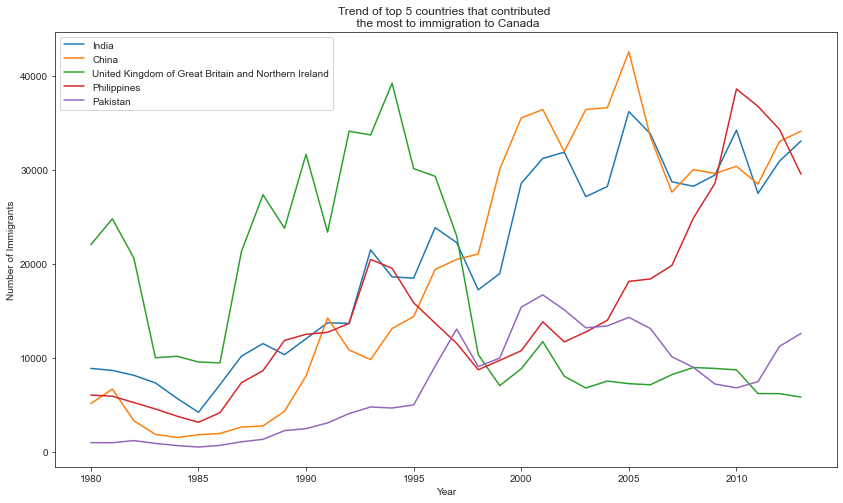

In [19]:
df_can["Total"].nlargest(5)
top5 = df_can.loc[['India', 'China','United Kingdom of Great Britain and Northern Ireland', 'Philippines', 'Pakistan'], years]
top5 = top5.transpose()

top5.plot(kind="line", figsize= (14,8))

plt.title("Trend of top 5 countries that contributed \n the most to immigration to Canada")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.legend()
plt.show()

# Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

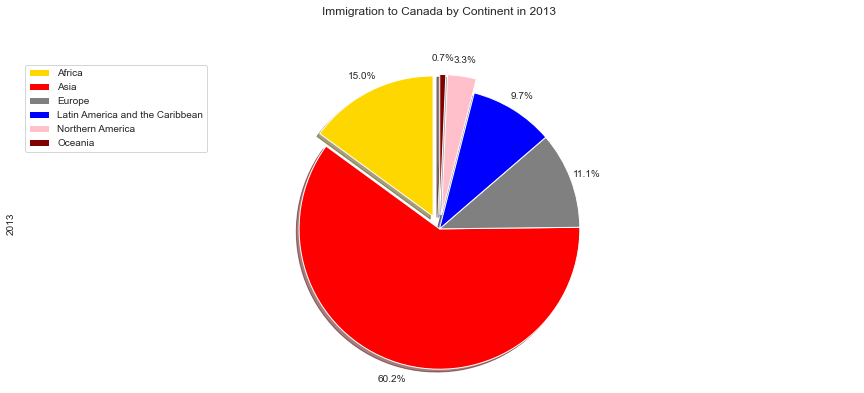

In [20]:
df_continents = df_can.groupby('Continent', axis = 0).sum()
colors_list = ['gold', 'red', 'grey', 'blue', 'pink', 'maroon']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.starts from 90degree anticlockwise

df_continents['2013'].plot(kind = 'pie',
                           startangle = 90,
                           shadow = True,
                           labels = None,
                           figsize = (15,6),
                           autopct = '%1.1f%%',
                           pctdistance = 1.12,
                           colors = colors_list,
                           explode = explode_list)

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

# show plot
plt.show()

# Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [21]:
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [22]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


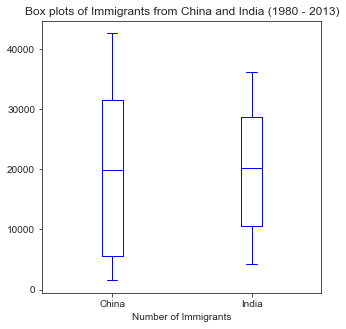

In [23]:
df_CI.plot(kind='box', figsize=(5, 5),color='blue')

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

# Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [24]:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [25]:
#List of decades(80s, 90s, 00s )
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [26]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


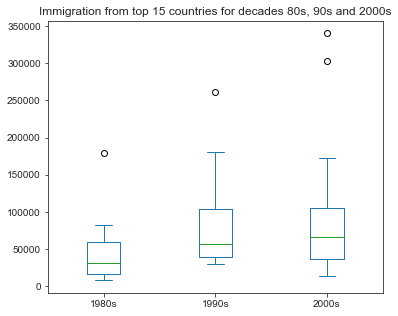

In [27]:
new_df.plot(kind='box', figsize=(6, 5))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

# Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

In [28]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

In [29]:
df_total = pd.DataFrame(df_countries.sum(axis=1))

In [30]:
df_total.reset_index(inplace=True)

In [31]:
df_total.columns = ['year', 'total']

In [32]:
df_total['year'] = df_total['year'].astype(int)

In [33]:
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


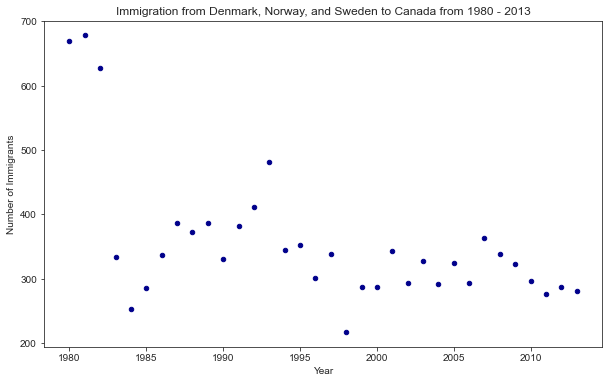

In [34]:
import matplotlib.pyplot as plt
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# show plot
plt.show()

# Analyzing the effect of Argentina's great depression

Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalizedvalue of the population for each year.

In [35]:
df_can_a = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_a.index = map(int, df_can_a.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_a.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_a.reset_index(inplace=True)

# view the changes
df_can_a.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [36]:
# normalize Brazil data
norm_brazil = (df_can_a['Brazil']-df_can_a['Brazil'].min())/(df_can_a['Brazil'].max()-df_can_a['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_a['Argentina']-df_can_a['Argentina'].min())/(df_can_a['Argentina'].max()-df_can_a['Argentina'].min())

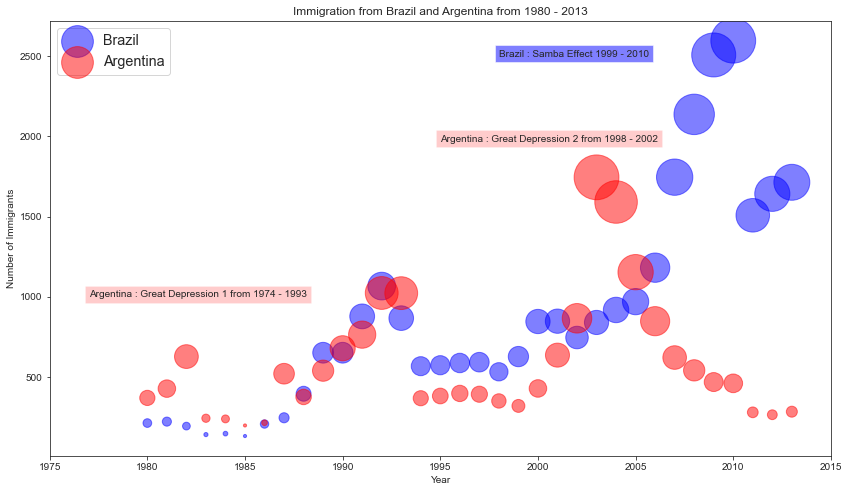

In [37]:
#Scatter Plot
# Brazil
ax0 = df_can_a.plot(kind='scatter',x='Year',y='Brazil', figsize=(14, 8),alpha=0.5,# transparency 
                    color='blue',s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015))

# Argentina
ax1 = df_can_a.plot(kind='scatter',x='Year', y='Argentina', alpha=0.5, color="red",s=norm_argentina * 2000 + 10,ax = ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

plt.text(1977,1000, 'Argentina : Great Depression 1 from 1974 - 1993',bbox=dict(facecolor='red', alpha=0.2))
plt.text(1995,1970, 'Argentina : Great Depression 2 from 1998 - 2002',bbox=dict(facecolor='red', alpha=0.2))
plt.text(1998,2500, 'Brazil : Samba Effect 1999 - 2010',bbox=dict(facecolor='blue', alpha=0.5))

plt.show()

# Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010.

Check if the immigration data reflect these events?

# Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013.

In [38]:
China = df_can_a['China']
norm_China = (( China - China.min())/ (China.max() - China.min()))

India = df_can_a['India']
norm_India = ((India - India.min()) / (India.max() - India.min()))

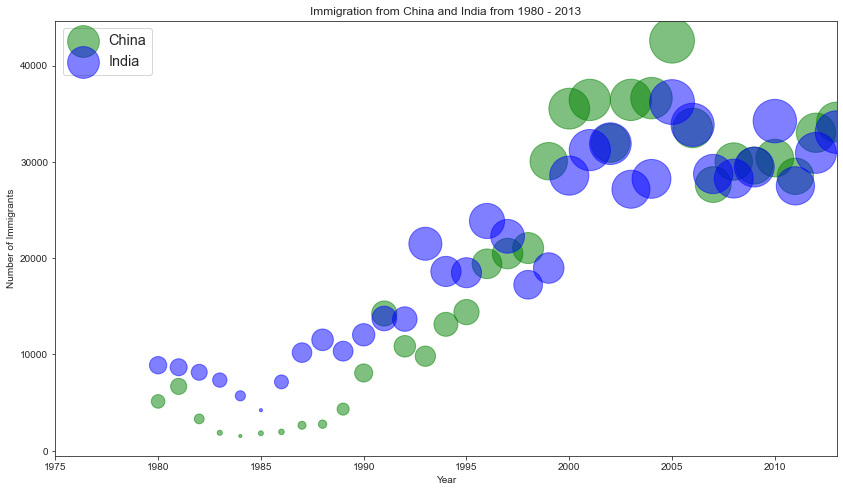

In [39]:
# China
ax0 = df_can_a.plot(kind='scatter',x='Year', y='China',figsize=(14, 8),alpha=0.5, # transparency
color='green',s=norm_China * 2000 + 10,  # pass in weights 
                xlim=(1975, 2013))

# India
ax1 = df_can_a.plot(kind='scatter',x='Year', y='India', alpha=0.5,color="blue", s=norm_India * 2000 + 10,ax = ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')